In [39]:
import astropy
from astropy.io import fits
from matplotlib import pyplot as plt  
from matplotlib.colors import LogNorm
import numpy as np  

In [56]:
def plot_fits(
    data: np.ndarray,
    title: str,
    norm: LogNorm = LogNorm(),
):
    if data is not None:
        # Handle byte-swapping if needed
        # data = np.nan_to_num(data, nan=0.0)
        
        # Plot the data
        fig, ax = plt.subplots(figsize=(10, 5))

        im = ax.imshow(data, cmap='gray', origin='lower', norm=norm, aspect='auto')
        ax.set_title(title)
        ax.set_xlabel('X Pixels')
        ax.set_ylabel('Y Pixels')

        cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad = 0.025)
        cbar.set_label('Pixel Intensity')

        plt.show()
    else:
        print("No data found in the FITS file.")

Filename: ./data/source.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (2720, 512)   int16 (rescales to uint16)   


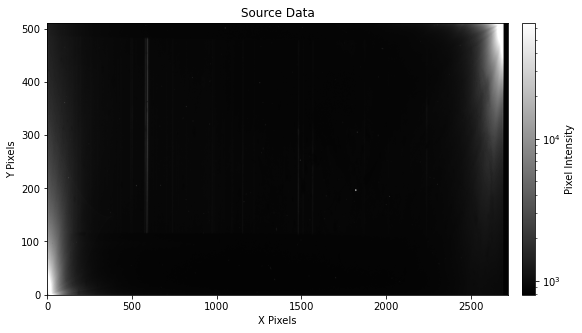

SIMPLE  =                    T  / Standard Fits                                 
BITPIX  =                   16  / Bits par pixel                                
NAXIS   =                    2  / Nombre de dimensions                          
NAXIS1  =                 2720  / Axe des X                                     
NAXIS2  =                  512  / Axe des Y                                     
BSCALE  =           1.000000E0  / REAL = TAPE*BSCALE + BZERO                    
BZERO   =           3.276800E4  /                                               
OBJECT  = 'orion   '           / Nom de l'objet                                 
OBSERVAT= 'omm     '           / Observatoire                                   
EXPTIME =              1800.00  / Temps d'exposition (sec)                      
DARKTIME=              1800.00  / Temps total ecoule (sec)                      
IMAGETYP= 'object  '           / Objet, Flat, Bias, etc.                        
DATE-OBS= '2019-10-27T08:21:

 [astropy.io.fits.verify]


In [57]:
file_path = './data/source.fits'  
hdul = fits.open(file_path)

# Display the FITS file structure
hdul.info()

# Extract data from the FITS file
data = hdul[0].data
hdul.close()

# Plot the data
plot_fits(
    data,
    title='Source Data',
    norm=LogNorm(),
)

# Check header data
header = hdul[0].header
print(repr(header))

Filename: ./data/calibration.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (2720, 512)   int16 (rescales to uint16)   


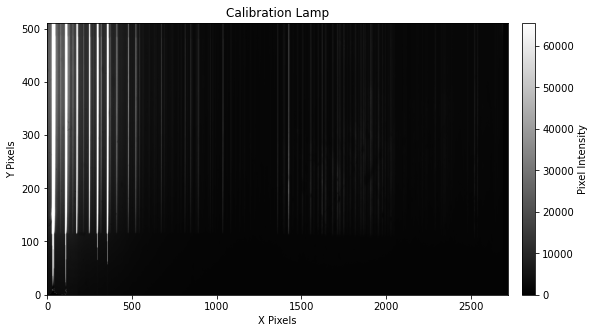

SIMPLE  =                    T  / Standard Fits                                 
BITPIX  =                   16  / Bits par pixel                                
NAXIS   =                    2  / Nombre de dimensions                          
NAXIS1  =                 2720  / Axe des X                                     
NAXIS2  =                  512  / Axe des Y                                     
BSCALE  =           1.000000E0  / REAL = TAPE*BSCALE + BZERO                    
BZERO   =           3.276800E4  /                                               
OBJECT  = 'lampecuar'          / Nom de l'objet                                 
OBSERVAT= 'omm     '           / Observatoire                                   
EXPTIME =                 5.00  / Temps d'exposition (sec)                      
DARKTIME=                 5.00  / Temps total ecoule (sec)                      
IMAGETYP= 'comp    '           / Objet, Flat, Bias, etc.                        
DATE-OBS= '2019-10-27T08:19:

In [61]:
file_path = './data/calibration.fits'  
hdul = fits.open(file_path)

# Display the FITS file structure
hdul.info()

# Extract data from the FITS file
data = hdul[0].data
hdul.close()

# Plot the data
plot_fits(
    data,
    title='Calibration Lamp',
    norm=None,  # Linear scale
)

# Check header data
header = hdul[0].header
print(repr(header))

Filename: ./data/dark0001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (2720, 512)   int16 (rescales to uint16)   


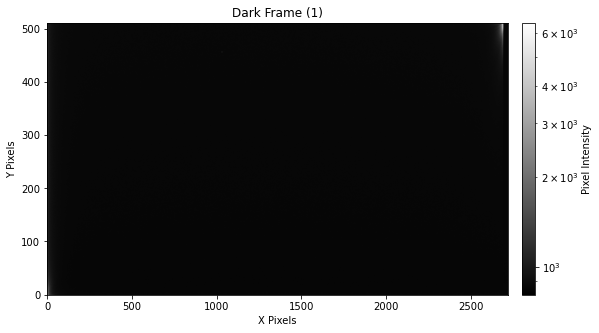

Filename: ./data/dark0002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (2720, 512)   int16 (rescales to uint16)   


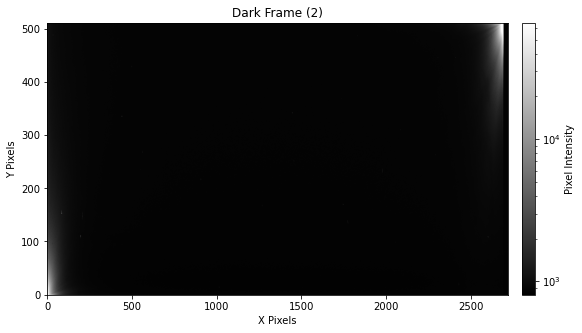

Filename: ./data/dark0003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      52   (2720, 512)   int16 (rescales to uint16)   


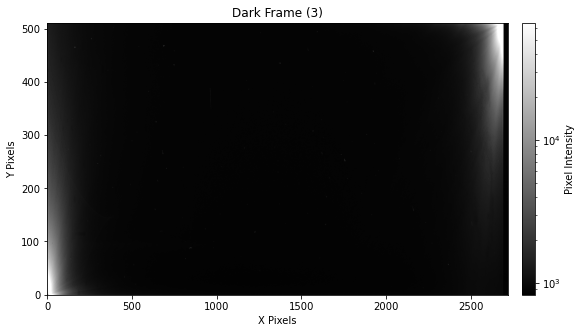

In [63]:
for i in range(1, 4):
    file_path = f'./data/dark000{i}.fits'  
    hdul = fits.open(file_path)

    # Display the FITS file structure
    hdul.info()

    # Extract data from the FITS file
    data = hdul[0].data
    hdul.close()

    # Plot the data
    plot_fits(
        data,
        title=f'Dark Frame ({i})',
        norm=LogNorm(),  # Linear scale
    )

    # Check header data
    header = hdul[0].header
    #print(repr(header))

In [ ]:
import json

required_flags = ["passed_initial_cut", "not_incoherent_beam", "not_known_pulsar",
                  "extragalactic", "not_duplicate", "endorsed", "callback_exists"]
required_pipelines = ["spreadsheet"]


with open("/Users/namanjain/Downloads/raw_table_all_events_20250113.json", "r") as handler:
    table = json.load(handler)
    
event_ids = [eid for eid in table.keys()
             if all(table[eid]["flags"][req] for req in required_flags)
             and all(req in table[eid] for req in required_pipelines)]



'9386707'